In [23]:
from qiskit import *
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The *Delayed-Choice Quantum Eraser* is a thought experiment that was first proposed by Yoon-Ho Kim, R. Yu, S.P. Kulik, Y.H. Shih, and Marlan O. Scully in 1999, is a variation of Young's Double-Slit Experiment, related to the possibility that a measurement made on a state of a system can affect the state of the system in the past. This can be related to the Double-Slit Experiment by using a **quantum detector/eraser** to erase the which-path information of the particles that pass through the slit, instead of the classical detectors used in the original experiment.

Interference patterns can be determined by measuring the detector qubit in the computational basis. If the detector qubit is measured in the state $\ket{0}$, the which-path information is erased, and the interference pattern is observed. If the detector qubit is measured in the state $\ket{1}$, the which-path information is preserved, and the interference pattern is destroyed. Hence by measuring the detector qubit, we can influence an individual electron/photon's past.

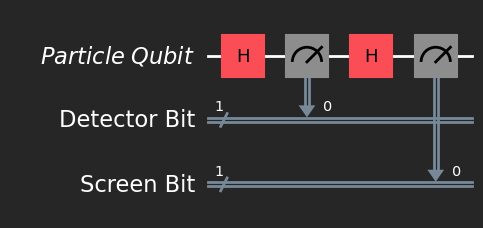

In [24]:
qr_1 = QuantumRegister(1, 'Particle Qubit')
cr_1 = ClassicalRegister(1, 'Detector Bit')
cr_2 = ClassicalRegister(1, 'Screen Bit')

qc_1 = QuantumCircuit(qr_1, cr_1, cr_2)
qc_1.h(0)
qc_1.measure(0, 0)
qc_1.h([0])
qc_1.measure(0, 1)

qc_1.draw('mpl', style = 'iqx-dark')

In [25]:
backend = AerSimulator()
result = backend.run(qc_1).result()
counts = result.get_counts(qc_1)

print(counts)

{'0 0': 270, '1 1': 274, '1 0': 222, '0 1': 258}


Comparing with results from the Double-Slit Experiment, the interference pattern is observed when the which-path information is erased, and the interference pattern is destroyed when the which-path information is preserved.

We can also incorporate a CNOT or entangling gate to the quantum eraser to demonstrate the delayed-choice quantum eraser:

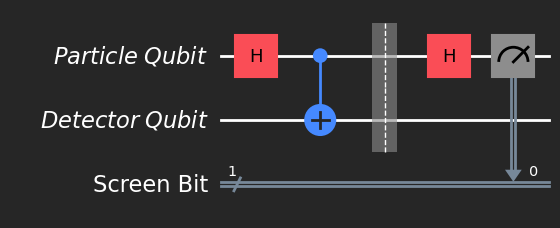

In [26]:
qr_2 = QuantumRegister(1, 'Detector Qubit')

qc_2 = QuantumCircuit(qr_1, qr_2, cr_2)
qc_2.h(0)
qc_2.cx(0, 1)   

qc_2.barrier()
qc_2.h([0])
qc_2.measure(0, 0)

qc_2.draw('mpl', style = 'iqx-dark')

In [27]:
result = backend.run(qc_2).result()
counts = result.get_counts(qc_2)

print(counts)

{'0': 505, '1': 519}


This tells us that the interference pattern is erased, as the which-path information is preserved. Measuring the detector can be done by a standard $Z$-basis measurement:

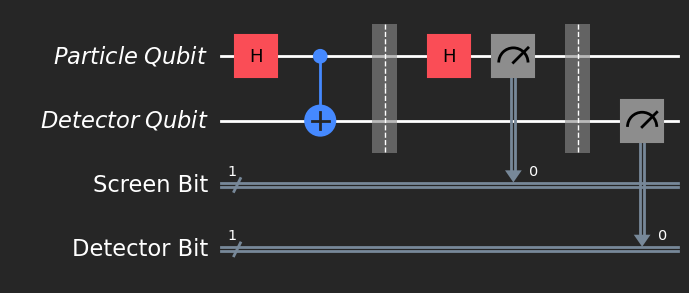

In [28]:
qc_3 = QuantumCircuit(qr_1, qr_2, cr_2, cr_1)
qc_3.h(0)
qc_3.cx(0, 1)

qc_3.barrier()
qc_3.h([0])
qc_3.measure(0, 0)

qc_3.barrier()
qc_3.measure(1, 1)

qc_3.draw('mpl', style = 'iqx-dark')

In [30]:
result = backend.run(qc_3).result()
counts = result.get_counts(qc_3)

print(counts)

{'0 0': 267, '1 0': 271, '0 1': 250, '1 1': 236}


This tells us that the interference pattern is erased again, as the which-path information is preserved. If we make an $X$-basis measurement on the detector qubit instead:

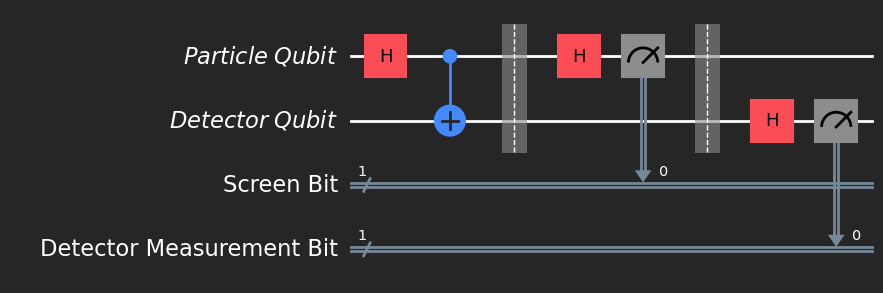

In [32]:
cr_3 = ClassicalRegister(1, 'Detector Measurement Bit')

qc_4 = QuantumCircuit(qr_1, qr_2, cr_2, cr_3)
qc_4.h(0)
qc_4.cx(0, 1)

qc_4.barrier()
qc_4.h([0])
qc_4.measure(0, 0)

qc_4.barrier()
qc_4.h(1)
qc_4.measure(1, 1)

qc_4.draw('mpl', style = 'iqx-dark')

In [33]:
result = backend.run(qc_4).result()
counts = result.get_counts(qc_4)

print(counts)

{'1 1': 512, '0 0': 512}


This time, the interference pattern is observed, as the which-path information is erased. The detector qubit is also **correlated** with he photon's, as their states are entangled. Another inference is that doing this $X$-basis measurement has the **same effect** as a classical measurement demonstrated in the Double-Slit Experment. The entanglement of the qubits gives the **illusion** that the measurement of the detector qubit has influenced the past state of the photon.